# Differential Expression Analysis using PyDeSeq2
## [GSE17193 (Arabidopsis thaliana)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE17193)
### Title
Transcript profile of chitosan-treated Arabidopsis seedlings
### Design
Arabidopsis thaliana, ecotype Columbia (Col-0) seeds were sterilized for 7 min in 1.7% (v/v) bleach solution, incubated over night in 4% PPM (Plant Preservative Mixture, Plant Cell Technology, Washington DC, USA) in a full strength sterilized Murashige-Skoog (MS) salt solution with gentle shaking. Subsequently, the seeds were rinsed in abundant sterile water and transferred into 2.5 ml liquid growing media (MS half strength solution) with 0.05% PPM in 6-well plates. The plates were incubated in the dark at 4 °C for two days and finally transferred to continuous light (90µm photons/ m-2) with gentle swirling for four days in a plant growth chamber at 22 °C.
. Treatments were performed by comparing a control solution containing the solvent used to solubilize chitosan, and a chitosan solution concentrated 150 µg/ml.
### Sample ID's
* GSM429956	No Chitosan Control 1
* GSM429961	No Chitosan Control 2
* GSM429980	Chitosan 3h Treatment 1
* GSM429981	Chitosan 3h Treatment 2

#### Name: Aniket Yadav (20BTBINF003)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, rankdata
import pandas as pd

In [27]:
expr = pd.read_csv('expression.csv').set_index('ID')
expr.head()

NoChitosanControl1  NoChitosanControl2  Chitosan3hTreatment1  \
ID                                                                        
244901_at                 8.3                10.8                   9.5   
244902_at                14.2                 9.2                  12.1   
244903_at                25.5                31.1                  28.1   
244904_at                 1.9                 1.9                   8.0   
244905_at                 7.0                 5.3                   1.9   

           Chitosan3hTreatment2  
ID                               
244901_at                  10.4  
244902_at                  10.1  
244903_at                  35.7  
244904_at                   4.0  
244905_at                   8.2

## Statistical Analysis of Normalized Counts

In [28]:
design = ['C', 'C', 'T', 'T']

(unq, samples_count, colstrt) = ([], [], [])
for char in design:
    if char not in unq: unq.append(char)
for i in unq:
    samples_count.append(design.count(i))
    colstrt.append(design.index(i))
    
number_of_samples = design.__len__()
colstrt, samples_count, unq, number_of_samples

([0, 2], [2, 2], ['C', 'T'], 4)

In [29]:
(s1, s2) = (expr.iloc[:, colstrt[0]:colstrt[0]+samples_count[0]], 
            expr.iloc[:, colstrt[1]:colstrt[1]+samples_count[1]])
s1.shape

(22766, 2)

In [30]:
# combined expression
combine_s1 = s1.sum(axis=1)/s1.shape[1]
combine_s2 = s2.sum(axis=1)/s2.shape[1]

In [31]:
# avg. expression
avg = expr.sum(axis=1)/number_of_samples
avg

ID
244901_at           9.75
244902_at          11.40
244903_at          30.10
244904_at           3.95
244905_at           5.60
                   ...  
AFFX-ThrX-3_at     94.95
AFFX-ThrX-5_at      9.85
AFFX-ThrX-M_at     25.45
AFFX-TrpnX-3_at     2.00
AFFX-TrpnX-5_at     3.15
Length: 22766, dtype: float64

In [32]:
# fold changes
(m2, m1) = (s2.sum(axis=1)/samples_count[1], s1.sum(axis=1)/samples_count[0])
fc = (m2-m1)/m1
log2fc = np.log2(m2/m1)
fc

ID
244901_at          0.041885
244902_at         -0.051282
244903_at          0.127208
244904_at          2.157895
244905_at         -0.178862
                     ...   
AFFX-ThrX-3_at     0.133708
AFFX-ThrX-5_at    -0.150235
AFFX-ThrX-M_at     0.086066
AFFX-TrpnX-3_at   -0.688525
AFFX-TrpnX-5_at    0.100000
Length: 22766, dtype: float64

In [33]:
# T-statistics (two sampled student t-score)
(x1, x2) = (s1.sum(axis=1)/samples_count[0], s2.sum(axis=1)/samples_count[1])
(n1, n2) = (s1.shape[0], s2.shape[0])
(sd1, sd2) = (x1.std(ddof=1), x2.std(ddof=1))
DOF = (n1+n2)-2

s_dalta = (((sd1**2)/n1) + ((sd2**2)/n2))**0.5
tstat = (x1-x2)/s_dalta
tstat

ID
244901_at         -0.118821
244902_at          0.178232
244903_at         -1.069392
244904_at         -1.217919
244905_at          0.326759
                     ...   
AFFX-ThrX-3_at    -3.534936
AFFX-ThrX-5_at     0.475285
AFFX-ThrX-M_at    -0.623812
AFFX-TrpnX-3_at    0.623812
AFFX-TrpnX-5_at   -0.089116
Length: 22766, dtype: float64

In [34]:
# P-value estimation from t-score
pval = 2 * (1 - t.cdf(np.abs(tstat), DOF)) # two tail
pval = pd.Series(pval, index=tstat.index)
pval

ID
244901_at          0.905417
244902_at          0.858542
244903_at          0.284899
244904_at          0.223261
244905_at          0.743852
                     ...   
AFFX-ThrX-3_at     0.000408
AFFX-ThrX-5_at     0.634586
AFFX-ThrX-M_at     0.532754
AFFX-TrpnX-3_at    0.532754
AFFX-TrpnX-5_at    0.928990
Length: 22766, dtype: float64

In [35]:
# p-adj values from p-values
rankpval = rankdata(pval)
padj = pval * len(pval)/rankpval
padj

ID
244901_at          0.972849
244902_at          0.954676
244903_at          0.459446
244904_at          0.375805
244905_at          0.892418
                     ...   
AFFX-ThrX-3_at     0.001046
AFFX-ThrX-5_at     0.813869
AFFX-ThrX-M_at     0.729984
AFFX-TrpnX-3_at    0.727859
AFFX-TrpnX-5_at    0.984333
Length: 22766, dtype: float64

In [36]:
deStats = pd.DataFrame({'group_Normal': combine_s1, 'group_Treated': combine_s2, 'avgExpr': avg, 
                        'foldChange': fc, 'log2foldChange': log2fc, 'stat': tstat, 'p_value': pval,
                        'p_adj': padj}, index=expr.index)
deStats

group_Normal  group_Treated  avgExpr  foldChange  \
ID                                                                  
244901_at                9.55           9.95     9.75    0.041885   
244902_at               11.70          11.10    11.40   -0.051282   
244903_at               28.30          31.90    30.10    0.127208   
244904_at                1.90           6.00     3.95    2.157895   
244905_at                6.15           5.05     5.60   -0.178862   
...                       ...            ...      ...         ...   
AFFX-ThrX-3_at          89.00         100.90    94.95    0.133708   
AFFX-ThrX-5_at          10.65           9.05     9.85   -0.150235   
AFFX-ThrX-M_at          24.40          26.50    25.45    0.086066   
AFFX-TrpnX-3_at          3.05           0.95     2.00   -0.688525   
AFFX-TrpnX-5_at          3.00           3.30     3.15    0.100000   

                 log2foldChange      stat   p_value     p_adj  
ID                                                             
244901_at              0.059196 -0.118821  0.905417  0.972849  
244902_at             -0.075949  0.178232  0.858542  0.954676  
244903_at              0.172754 -1.069392  0.284899  0.459446  
244904_at              1.658963 -1.217919  0.223261  0.375805  
244905_at             -0.284303  0.326759  0.743852  0.892418  
...                         ...       ...       ...       ...  
AFFX-ThrX-3_at         0.181049 -3.534936  0.000408  0.001046  
AFFX-ThrX-5_at        -0.234864  0.475285  0.634586  0.813869  
AFFX-ThrX-M_at         0.119111 -0.623812  0.532754  0.729984  
AFFX-TrpnX-3_at       -1.682810  0.623812  0.532754  0.727859  
AFFX-TrpnX-5_at        0.137504 -0.089116  0.928990  0.984333  

[22766 rows x 8 columns]

## Differentially significant gene analysis

In [37]:
deStats = deStats[deStats.avgExpr >= 10]
deStats

group_Normal  group_Treated   avgExpr    foldChange  \
ID                                                                          
244902_at                    11.70          11.10    11.400 -5.128205e-02   
244903_at                    28.30          31.90    30.100  1.272085e-01   
244906_at                    28.95          24.10    26.525 -1.675302e-01   
244912_at                    57.85          74.55    66.200  2.886776e-01   
244920_s_at                  24.85          15.85    20.350 -3.621730e-01   
...                            ...            ...       ...           ...   
AFFX-r2-Ec-bioD-5_at        594.60         594.60   594.600 -1.911989e-16   
AFFX-r2-P1-cre-3_at        3375.85        3331.70  3353.775 -1.307819e-02   
AFFX-r2-P1-cre-5_at        2659.80        2903.95  2781.875  9.179262e-02   
AFFX-ThrX-3_at               89.00         100.90    94.950  1.337079e-01   
AFFX-ThrX-M_at               24.40          26.50    25.450  8.606557e-02   

                      log2foldChange          stat       p_value     p_adj  
ID                                                                          
244902_at              -7.594885e-02  1.782321e-01  8.585415e-01  0.954676  
244903_at               1.727544e-01 -1.069392e+00  2.848986e-01  0.459446  
244906_at              -2.645302e-01  1.440709e+00  1.496737e-01  0.266407  
244912_at               3.658914e-01 -4.960792e+00  7.045874e-07  0.000002  
244920_s_at            -6.487630e-01  2.673481e+00  7.509533e-03  0.017031  
...                              ...           ...           ...       ...  
AFFX-r2-Ec-bioD-5_at   -3.203427e-16  3.377107e-14  1.000000e+00  1.005166  
AFFX-r2-P1-cre-3_at    -1.899230e-02  1.311491e+01  0.000000e+00  0.000000  
AFFX-r2-P1-cre-5_at     1.266988e-01 -7.252560e+01  0.000000e+00  0.000000  
AFFX-ThrX-3_at          1.810489e-01 -3.534936e+00  4.082787e-04  0.001046  
AFFX-ThrX-M_at          1.191112e-01 -6.238122e-01  5.327540e-01  0.729984  

[15945 rows x 8 columns]

In [38]:
deStats = deStats[(abs(deStats.log2foldChange) > 0.5) & (deStats.p_adj < 0.05)]
deStats = deStats[deStats.p_adj != 0.0]
deStats

group_Normal  group_Treated  avgExpr  foldChange  log2foldChange  \
ID                                                                              
244920_s_at         24.85          15.85   20.350   -0.362173       -0.648763   
244995_at           66.55          43.10   54.825   -0.352367       -0.626751   
245005_at           43.15          24.10   33.625   -0.441483       -0.840327   
245078_at           35.80          20.05   27.925   -0.439944       -0.836357   
245079_at           12.90          26.05   19.475    1.019380        1.013912   
...                   ...            ...      ...         ...             ...   
267580_at           35.85          22.25   29.050   -0.379358       -0.688168   
267581_at           64.65          44.90   54.775   -0.305491       -0.525935   
267582_at           21.70           5.05   13.375   -0.767281       -2.103340   
267602_at           54.35          33.40   43.875   -0.385465       -0.702432   
267614_at           16.60           4.20   10.400   -0.746988       -1.982722   

                 stat       p_value         p_adj  
ID                                                 
244920_s_at  2.673481  7.509533e-03  1.703148e-02  
244995_at    6.965903  3.307132e-12  1.255150e-11  
245005_at    5.658868  1.532880e-08  5.073424e-08  
245078_at    4.678592  2.896814e-06  8.557007e-06  
245079_at   -3.906253  9.387380e-05  2.534398e-04  
...               ...           ...           ...  
267580_at    4.039927  5.355556e-05  1.468794e-04  
267581_at    5.866805  4.473369e-09  1.515487e-08  
267582_at    4.945940  7.604686e-07  2.325899e-06  
267602_at    6.223269  4.911311e-10  1.733100e-09  
267614_at    3.683463  2.303533e-04  6.015742e-04  

[1723 rows x 8 columns]

## Merging Significant genes with expression set

In [39]:
# merge or filter differentially expressed genes in expression normalized
expr = expr.reset_index()
deStats = deStats.reset_index()
expr = expr.merge(deStats, how='inner', on='ID')
expr.head()

ID  NoChitosanControl1  NoChitosanControl2  Chitosan3hTreatment1  \
0  244920_s_at                17.9                31.8                  18.7   
1    244995_at                66.2                66.9                  49.7   
2    245005_at                45.7                40.6                  34.9   
3    245078_at                35.9                35.7                  27.5   
4    245079_at                13.2                12.6                  23.1   

   Chitosan3hTreatment2  group_Normal  group_Treated  avgExpr  foldChange  \
0                  13.0         24.85          15.85   20.350   -0.362173   
1                  36.5         66.55          43.10   54.825   -0.352367   
2                  13.3         43.15          24.10   33.625   -0.441483   
3                  12.6         35.80          20.05   27.925   -0.439944   
4                  29.0         12.90          26.05   19.475    1.019380   

   log2foldChange      stat       p_value         p_adj  
0       -0.648763  2.673481  7.509533e-03  1.703148e-02  
1       -0.626751  6.965903  3.307132e-12  1.255150e-11  
2       -0.840327  5.658868  1.532880e-08  5.073424e-08  
3       -0.836357  4.678592  2.896814e-06  8.557007e-06  
4        1.013912 -3.906253  9.387380e-05  2.534398e-04

## Gene Annotation

In [40]:
def readGPLFile(filePath):
    '''
    Function for create table from GPL text file
    '''
    (table, disc) = ([], [])
    with open(filePath, 'r') as gpl:
        for line in gpl.readlines():
            if line[0] != '#':
                table.append(line.replace('\n', '').split('\t'))
            else: disc.append(line)
    return pd.DataFrame(table[1:], columns=table[0])

for_annot = readGPLFile("GPL198-17390.txt")
for_annot.head(3)

ID     ORF SPOT_ID Species Scientific Name Annotation Date  \
0  244901_at   orf25            Arabidopsis thaliana     Oct 6, 2014   
1  244902_at   nad4L            Arabidopsis thaliana     Oct 6, 2014   
2  244903_at  orf149            Arabidopsis thaliana     Oct 6, 2014   

       Sequence Type                  Sequence Source  \
0  Exemplar sequence  Affymetrix Proprietary Database   
1  Exemplar sequence  Affymetrix Proprietary Database   
2  Exemplar sequence  Affymetrix Proprietary Database   

              Target Description Representative Public ID  \
0           hypothetical protein                    orf25   
1  NADH dehydrogenase subunit 4L                    nad4L   
2           hypothetical protein                   orf149   

             Gene Title Gene Symbol ENTREZ_GENE_ID RefSeq Transcript ID  \
0       unknown protein       ORF25         814597                        
1       unknown protein       NAD4L         814598                        
2  hypothetical protein   ArthMp059        3371309                        

         AGI                   Gene Ontology Biological Process  \
0  ATMG00640  0006754 // ATP biosynthetic process // inferre...   
1  ATMG00650  0009451 // RNA modification // inferred from e...   
2                                                                 

                    Gene Ontology Cellular Component  \
0  0000276 // mitochondrial proton-transporting A...   
1  0005739 // mitochondrion // inferred from elec...   
2  0005739 // mitochondrion // inferred from elec...   

                    Gene Ontology Molecular Function  
0  0008270 // zinc ion binding // inferred from d...  
1  0003954 // NADH dehydrogenase activity // trac...  
2

In [41]:
for_annot = for_annot[["ID", "Gene Symbol"]]
for_annot["Gene Symbol"] = for_annot["Gene Symbol"].apply(lambda x: x.upper())
expr = expr.merge(for_annot, "inner", on="ID")
expr = expr.set_index('ID')
expr.to_csv("DifferentialSigs.csv")
expr.head()

NoChitosanControl1  NoChitosanControl2  Chitosan3hTreatment1  \
ID                                                                          
244920_s_at                17.9                31.8                  18.7   
244995_at                  66.2                66.9                  49.7   
245005_at                  45.7                40.6                  34.9   
245078_at                  35.9                35.7                  27.5   
245079_at                  13.2                12.6                  23.1   

             Chitosan3hTreatment2  group_Normal  group_Treated  avgExpr  \
ID                                                                        
244920_s_at                  13.0         24.85          15.85   20.350   
244995_at                    36.5         66.55          43.10   54.825   
245005_at                    13.3         43.15          24.10   33.625   
245078_at                    12.6         35.80          20.05   27.925   
245079_at                    29.0         12.90          26.05   19.475   

             foldChange  log2foldChange      stat       p_value         p_adj  \
ID                                                                              
244920_s_at   -0.362173       -0.648763  2.673481  7.509533e-03  1.703148e-02   
244995_at     -0.352367       -0.626751  6.965903  3.307132e-12  1.255150e-11   
245005_at     -0.441483       -0.840327  5.658868  1.532880e-08  5.073424e-08   
245078_at     -0.439944       -0.836357  4.678592  2.896814e-06  8.557007e-06   
245079_at      1.019380        1.013912 -3.906253  9.387380e-05  2.534398e-04   

                         Gene Symbol  
ID                                    
244920_s_at  ARTHMP086 /// AT2G07751  
244995_at                       ATPI  
245005_at                      RPS14  
245078_at                      DEAR3  
245079_at

## Gene Correlation

<Axes: >

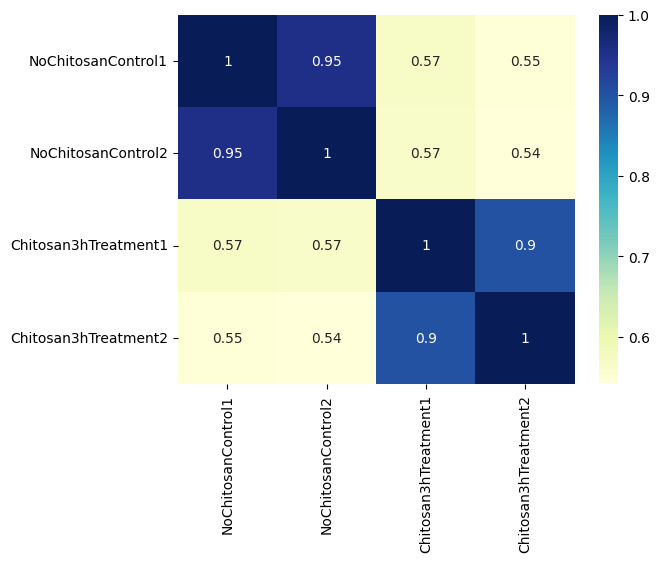

In [42]:
# sample correlation
sns.heatmap(expr.iloc[:, 0:4].corr(), annot=True, cmap='YlGnBu')

In [43]:
# gene correlation
corr = expr.iloc[:, 0:5].T.corr()
corr
# sns.heatmap(corr, annot=True, cmap='YlGnBu')
# corr.to_csv("GeneCorr.csv")

ID           244920_s_at  244995_at  245005_at  245078_at  245079_at  \
ID                                                                     
244920_s_at     1.000000   0.746489   0.612684   0.720740  -0.749652   
244995_at       0.746489   1.000000   0.948280   0.979814  -0.997731   
245005_at       0.612684   0.948280   1.000000   0.987900  -0.926121   
245078_at       0.720740   0.979814   0.987900   1.000000  -0.964139   
245079_at      -0.749652  -0.997731  -0.926121  -0.964139   1.000000   
...                  ...        ...        ...        ...        ...   
267580_at       0.580111   0.671709   0.412820   0.510527  -0.719990   
267581_at       0.709328   0.930052   0.774794   0.837838  -0.952650   
267582_at       0.674377   0.985680   0.907921   0.939147  -0.992214   
267602_at       0.281299   0.704807   0.549130   0.575629  -0.741113   
267614_at       0.689814   0.995447   0.940762   0.966332  -0.996065   

ID           245084_at  245090_at  245110_at  245113_at  245126_at  ...  \
ID                                                                  ...   
244920_s_at   0.628704   0.728964   0.633733   0.722888   0.507984  ...   
244995_at     0.948660   0.995355   0.972207   0.921617   0.870656  ...   
245005_at     0.833685   0.973514   0.888173   0.757479   0.730553  ...   
245078_at     0.873064   0.994319   0.917156   0.825546   0.768187  ...   
245079_at    -0.965237  -0.986656  -0.981636  -0.945643  -0.896786  ...   
...                ...        ...        ...        ...        ...  ...   
267580_at     0.837296   0.597398   0.774852   0.906482   0.883735  ...   
267581_at     0.987013   0.890807   0.970359   0.999361   0.967472  ...   
267582_at     0.987429   0.969797   0.997710   0.957840   0.940426  ...   
267602_at     0.890203   0.652336   0.850683   0.863486   0.960962  ...   
267614_at     0.969050   0.987656   0.988623   0.933108   0.906697  ...   

ID           267519_at  267535_at  267538_at  267539_at  267548_at  267580_at  \
ID                                                                              
244920_s_at  -0.773459   0.671471   0.528339   0.910999  -0.669457   0.580111   
244995_at    -0.908818   0.816751   0.945567   0.952648  -0.910080   0.671709   
245005_at    -0.730306   0.599857   0.987638   0.873836  -0.747780   0.412820   
245078_at    -0.810072   0.685298   0.967897   0.938041  -0.809419   0.510527   
245079_at     0.934031  -0.853686  -0.929003  -0.949507   0.935624  -0.719990   
...                ...        ...        ...        ...        ...        ...   
267580_at    -0.914014   0.976062   0.467310   0.640760  -0.912434   1.000000   
267581_at    -0.992231   0.970564   0.805047   0.875426  -0.997972   0.895596   
267582_at    -0.937934   0.876845   0.930356   0.904592  -0.956866   0.754372   
267602_at    -0.825732   0.886885   0.651575   0.532169  -0.898107   0.873467   
267614_at    -0.913518   0.835052   0.952984   0.921810  -0.928549   0.697006   

ID           267581_at  267582_at  267602_at  267614_at  
ID                                                       
244920_s_at   0.709328   0.674377   0.281299   0.689814  
244995_at     0.930052   0.985680   0.704807   0.995447  
245005_at     0.774794   0.907921   0.549130   0.940762  
245078_at     0.837838   0.939147   0.575629   0.966332  
245079_at    -0.952650  -0.992214  -0.741113  -0.996065  
...                ...        ...        ...        ...  
267580_at     0.895596   0.754372   0.873467   0.697006  
267581_at     1.000000   0.966396   0.869610   0.942973  
267582_at     0.966396   1.000000   0.814267   0.995882  
267602_at     0.869610   0.814267   1.000000   0.762428  
267614_at     0.942973   0.995882   0.762428   1.000000  

[1723 rows x 1723 columns]

## ShinyGO Enrichment analysis

In [44]:
# type: ignore
# create a function for plotting horizontal bars for enrich process OR pathways
def EnrichmentBars(foldEnrich, pathways, log10FDR, ngenes, plotitle, plotsize=(8, 4)):
    import matplotlib.pyplot as plt
    # Create a colormap
    cmap = plt.colormaps['viridis_r']
    fig, ax = plt.subplots(figsize=plotsize)
    # Normalize the values to the range of the colormap
    norm = plt.Normalize(vmin=min(log10FDR), vmax=max(log10FDR))
    # Create a list of colors
    colors = cmap(norm(log10FDR))

    # Create the bar plot
    for index, gene in enumerate(ngenes):
        ax.text(foldEnrich[index] + .1, index, str(gene))

    plt.barh(pathways, foldEnrich, color=colors)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax).set_label('-log10 (FDR)', rotation=270,labelpad=20)
    plt.title(f'Enrichment Plot: {plotitle}')
    plt.xlabel('Fold Enrichment')
    plt.show()

In [45]:
# Selected_databases = ['BP', 'MF', 'CC', 'InterPro', 'Pfam', 'Uniprot']

def result_reader(folder, fileAlise):
    import os
    dic = {}
    files = os.listdir(folder)
    if len(files) == fileAlise.__len__():
        print('Alise\t\tFilename\n---------------------------------')
        for i in range(len(files)):
            dic[fileAlise[i]] = pd.read_csv(folder+'/'+files[i])
            print(fileAlise[i], ':\t', files[i])
        return dic
    else: return 'Alise name for file must be same length as number of files containing in folder!'

sgoRes = result_reader('ShinyGOAnalysis', 
                              ['bp', 'cc', 'ip', 'mf', 'pf', 'up'])

Alise		Filename
---------------------------------
bp :	 ArabidShinyGOBP.csv
cc :	 ArabidShinyGOCC.csv
ip :	 ArabidShinyGOInterPro.csv
mf :	 ArabidShinyGOMF.csv
pf :	 ArabidShinyGOPfam.csv
up :	 ArabidShinyGOUniProt.csv


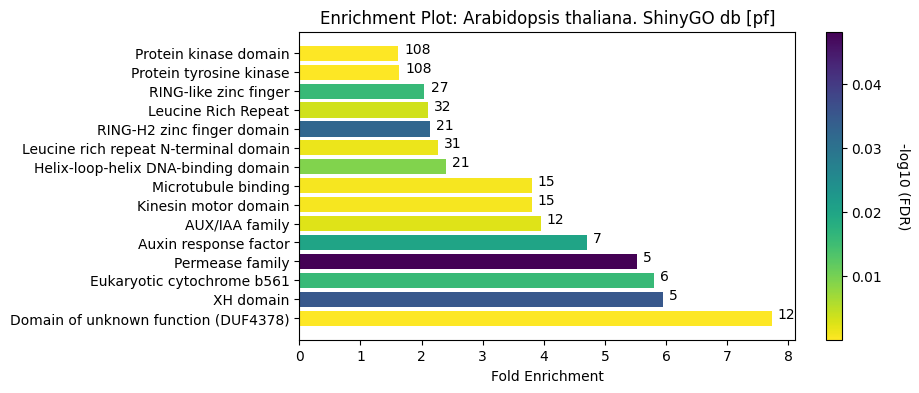

In [46]:
db = 'pf'
# type: ignore
pathways =   sgoRes[db].Pathway
foldEnrich = sgoRes[db].iloc[:, 3]
log10FDR =   sgoRes[db].iloc[:, 0]
ngenes =     sgoRes[db].nGenes
EnrichmentBars(foldEnrich, pathways, log10FDR, ngenes, 
               plotitle=f'Arabidopsis thaliana. ShinyGO db [{db}]')

In [47]:
mid = foldEnrich.median()
significantPathway = sgoRes[db][(foldEnrich > mid) & (log10FDR <= 0.005)]
significantPathway = significantPathway[["Pathway", "nGenes", "Genes"]]
print("Fold Enrichment Median: ", mid)
significantPathway

Fold Enrichment Median:  3.80118590861528


Pathway  nGenes  \
0  Domain of unknown function (DUF4378)      12   
5                        AUX/IAA family      12   

                                               Genes  
0  AT1G63670 AT2G17550 AT2G20240 LNG2 AT3G58650 A...  
5  IAA10 IAA12 ARF19 ARF11 IAA19 ARF18 IAA14 IAA1...

## STRING v12.0: Result Analysis

In [48]:
STRINGpath = "STRING_Analysis"
STRING = pd.read_table(STRINGpath+"/STRINGenrich.tsv").set_index("#category")
STRING.head()

term ID                                   term description  \
#category                                                                   
GO Process  GO:0006952                                   Defense response   
GO Process  GO:0044419  Biological process involved in interspecies in...   
GO Process  GO:0098542                 Defense response to other organism   
GO Process  GO:0051707                         Response to other organism   
GO Process  GO:0009607                        Response to biotic stimulus   

            genes mapped  enrichment score direction  false discovery rate  \
#category                                                                    
GO Process           100           1.38645    bottom              0.000003   
GO Process            79           1.44834    bottom              0.000240   
GO Process            61           1.58267    bottom              0.000240   
GO Process            76           1.42121    bottom              0.000430   
GO Process            79           1.21543    bottom              0.001500   

           method              matching proteins in your input (IDs)  \
#category                                                              
GO Process     ks  3702.A0A1P8BH59,3702.D7SFH9,3702.F4HVJ0,3702.F...   
GO Process     ks  3702.D7SFH9,3702.F4HVJ0,3702.F4J270,3702.O0452...   
GO Process     ks  3702.D7SFH9,3702.F4HVJ0,3702.O04529,3702.O2278...   
GO Process     ks  3702.D7SFH9,3702.F4HVJ0,3702.F4J270,3702.O0452...   
GO Process     ks  3702.D7SFH9,3702.F4HVJ0,3702.F4J270,3702.O0452...   

                     matching proteins in your input (labels)  
#category                                                      
GO Process  PICBP,LRK10L-2.6,T23K23.20,CATHB1,F21B7.6,F10D...  
GO Process  LRK10L-2.6,T23K23.20,BG3,2MMP,PXG3,C7A10.40,LA...  
GO Process  LRK10L-2.6,T23K23.20,2MMP,PXG3,C7A10.40,LAZ5,L...  
GO Process  LRK10L-2.6,T23K23.20,BG3,2MMP,PXG3,C7A10.40,LA...  
GO Process  LRK10L-2.6,T23K23.20,BG3,2MMP,PXG3,C7A10.40,ML...

In [49]:
PDclusters = pd.read_table(STRINGpath+"/uniprot(PlantDefence)clusters.tsv").set_index('#clustering method')
PDclusters

cluster number cluster color  gene count protein name  \
#clustering method                                                          
kmeans                           1           Red          10         ACD6   
kmeans                           1           Red          10         BAP2   
kmeans                           1           Red          10        CRK45   
kmeans                           1           Red          10        ERF1B   
kmeans                           1           Red          10         MKK1   
kmeans                           1           Red          10        MORC7   
kmeans                           1           Red          10         PAD4   
kmeans                           1           Red          10          PR5   
kmeans                           1           Red          10       SAG101   
kmeans                           1           Red          10        SARD1   
kmeans                           2        Yellow           5         AGO3   
kmeans                           2        Yellow           5         DCL2   
kmeans                           2        Yellow           5         DRD1   
kmeans                           2        Yellow           5         FIB2   
kmeans                           2        Yellow           5        PICBP   
kmeans                           3    Lime Green           4     F17A17.3   
kmeans                           3    Lime Green           4         LAZ5   
kmeans                           3    Lime Green           4   LRK10L-2.6   
kmeans                           3    Lime Green           4       RPP8L3   
kmeans                           4         Green           2         AMC2   
kmeans                           4         Green           2       CATHB1   
kmeans                           5          Blue           2    F15E12.20   
kmeans                           5          Blue           2    F18O19.30   
kmeans                           6        Purple           2         RLP3   
kmeans                           6        Purple           2         TAO1   

                   protein identifier  \
#clustering method                      
kmeans                    3702.Q8LPS2   
kmeans                    3702.Q58FX0   
kmeans                    3702.Q8GY82   
kmeans                    3702.Q8LDC8   
kmeans                    3702.Q94A06   
kmeans                    3702.F4JRS4   
kmeans                    3702.Q9S745   
kmeans                    3702.P28493   
kmeans                    3702.Q4F883   
kmeans                    3702.Q9C9T2   
kmeans                    3702.Q9SHF2   
kmeans                    3702.Q3EBC8   
kmeans                    3702.Q9SIW2   
kmeans                    3702.Q94AH9   
kmeans                3702.A0A1P8BH59   
kmeans                    3702.Q9S785   
kmeans                    3702.O48573   
kmeans                    3702.D7SFH9   
kmeans                    3702.Q9FJB5   
kmeans                    3702.Q7XJE5   
kmeans                    3702.F4HVZ1   
kmeans                    3702.Q9C8D6   
kmeans                    3702.O24658   
kmeans                    3702.Q9SHI4   
kmeans                    3702.Q9FI14   

                                                  protein description  
#clustering method                                                     
kmeans              Protein ACCELERATED CELL DEATH 6; Dose-depende...  
kmeans              BON1-associated protein 2; Negative regulator ...  
kmeans              Cysteine-rich receptor-like protein kinase 45;...  
kmeans              Ethylene-responsive transcription factor 1B; A...  
kmeans              Mitogen-activated protein kinase kinase 1; MEK...  
kmeans              Protein MICRORCHIDIA 7; Exhibits ATPase activi...  
kmeans              Lipase-like PAD4; Probable lipase required dow...  
kmeans              Pathogenesis-related protein 5; Partially resp...  
kmeans              Senescence-associated carboxylesterase 101; Ac...  
kmeans              Protein SAR DEFICIEN

In [50]:
STRING_locusID = "at3g07690" # FOR STRING
SHINYGO_locusID = "IAA10" # FOR SHINYGO
fcgenes = pd.read_csv("fcValue.csv")
fcgenes[fcgenes.iloc[:,0].isin([STRING_locusID.upper(), SHINYGO_locusID.upper()])]

Gene Symbol  log2foldChange
1079   AT3G07690       -0.574583
1484       IAA10        0.719340

## Regulations

In [51]:
print(expr[expr.log2foldChange > 0].shape[0], " UP REGs")
print(expr[expr.log2foldChange < 0].shape[0], " DOWN REGs")

459  UP REGs
1264  DOWN REGs
